# Imports

In [2]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import re
from collections import defaultdict
import seaborn as sns

# Read log

In [ ]:
def parse_training_log(log_file_path):
    metrics_by_epoch = defaultdict(lambda: {'valid': {}, 'test': {}})
    
    current_epoch = None
    current_phase = None  # 'valid' or 'test'
    
    with open(log_file_path, 'r') as file:
        for line in file:
            # Detect epoch with metrics
            epoch_match = re.search(r'on Epoch (\d+)', line)
            if epoch_match:
                current_epoch = int(epoch_match.group(1))
                continue

            # Detect validation or test section
            if 'valid set on' in line:
                current_phase = 'valid'
                continue
            elif 'test_training set on' in line:
                current_phase = 'test'
                continue
            
            # Extract metric lines
            metric_match = re.search(r'(\w+\(?[\w\d]*\)?): ([\d\.]+)', line)
            if metric_match and current_epoch is not None and current_phase:
                key = metric_match.group(1)
                value = float(metric_match.group(2))
                metrics_by_epoch[current_epoch][current_phase][key] = value


    return filtered_metrics

# Plot metrics

In [4]:
def plot_metrics(metrics_by_epoch):
    # Extract all epochs in order
    epochs = sorted(metrics_by_epoch.keys())
    
    # Collect all metric names
    sample_epoch = next(iter(metrics_by_epoch.values()))
    metric_names = sample_epoch['valid'].keys()

    # Set up the subplots (one per metric)
    num_metrics = len(metric_names)
    fig, axes = plt.subplots(1, num_metrics, figsize=(5 * num_metrics, 5), constrained_layout=True)

    # Make axes iterable in case there's only one metric
    if num_metrics == 1:
        axes = [axes]

    for i, metric in enumerate(metric_names):
        val_values = [metrics_by_epoch[epoch]['valid'][metric] for epoch in epochs]
        test_values = [metrics_by_epoch[epoch]['test'][metric] for epoch in epochs]

        axes[i].plot(epochs, val_values, label='Validation', marker='o')
        axes[i].plot(epochs, test_values, label='Test', marker='s')
        axes[i].set_title(metric, fontsize=12)
        axes[i].set_xlabel('Epoch')
        axes[i].set_ylabel('Value')
        axes[i].grid(True)
        axes[i].legend()

    plt.suptitle('Training Metrics over Epochs', fontsize=16)
    plt.show()

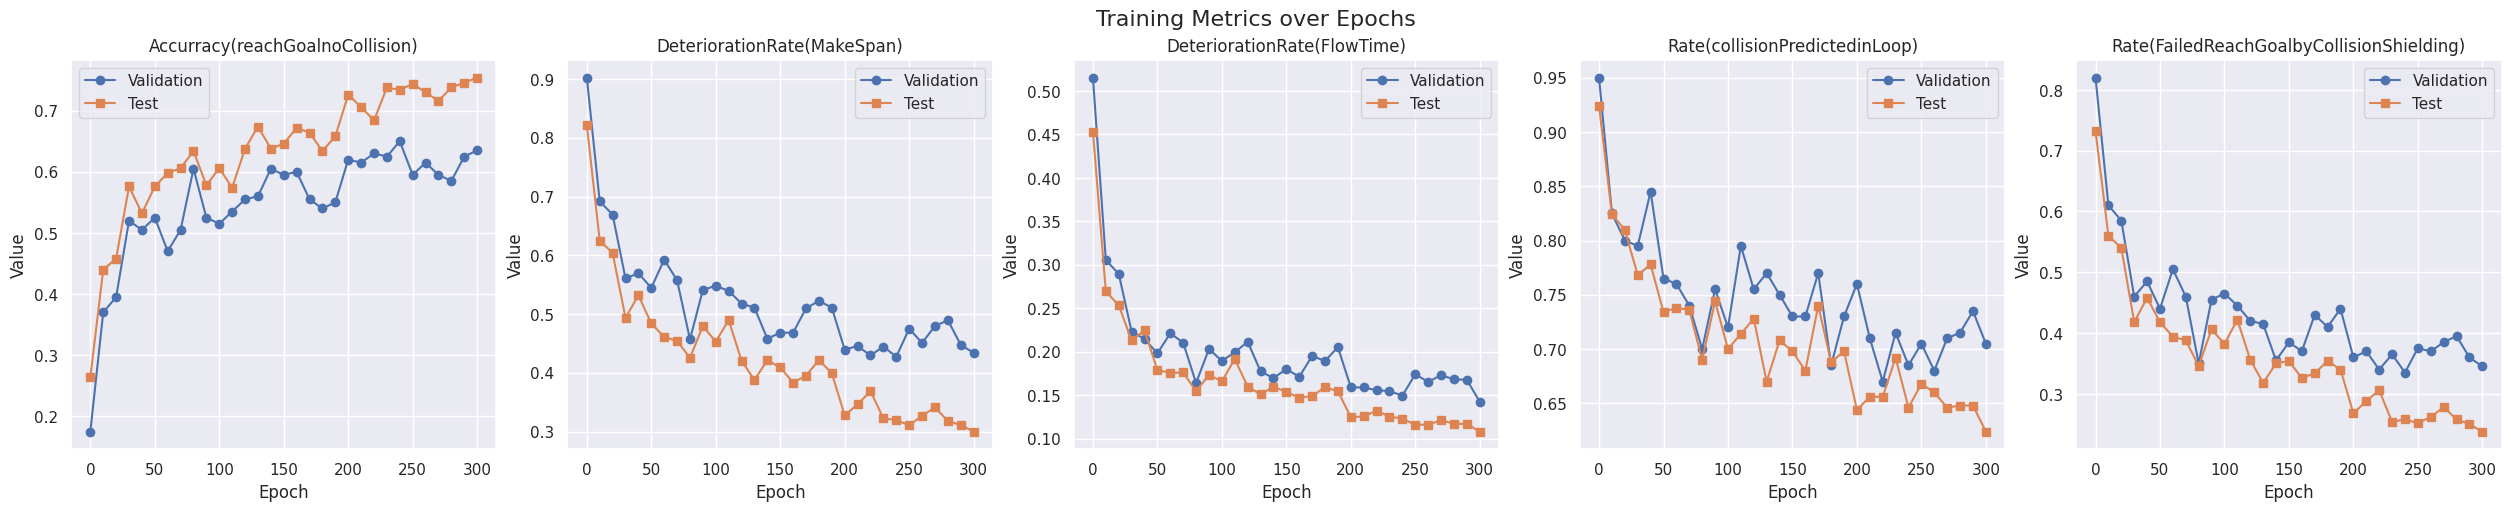

In [11]:
metrics_no_gat = parse_training_log(log_file_path='/home/roger/Desktop/DA150X Degree Project/7 Training Results/nogat/exp_debug_extended.log')
plot_metrics(metrics_by_epoch=metrics_no_gat)

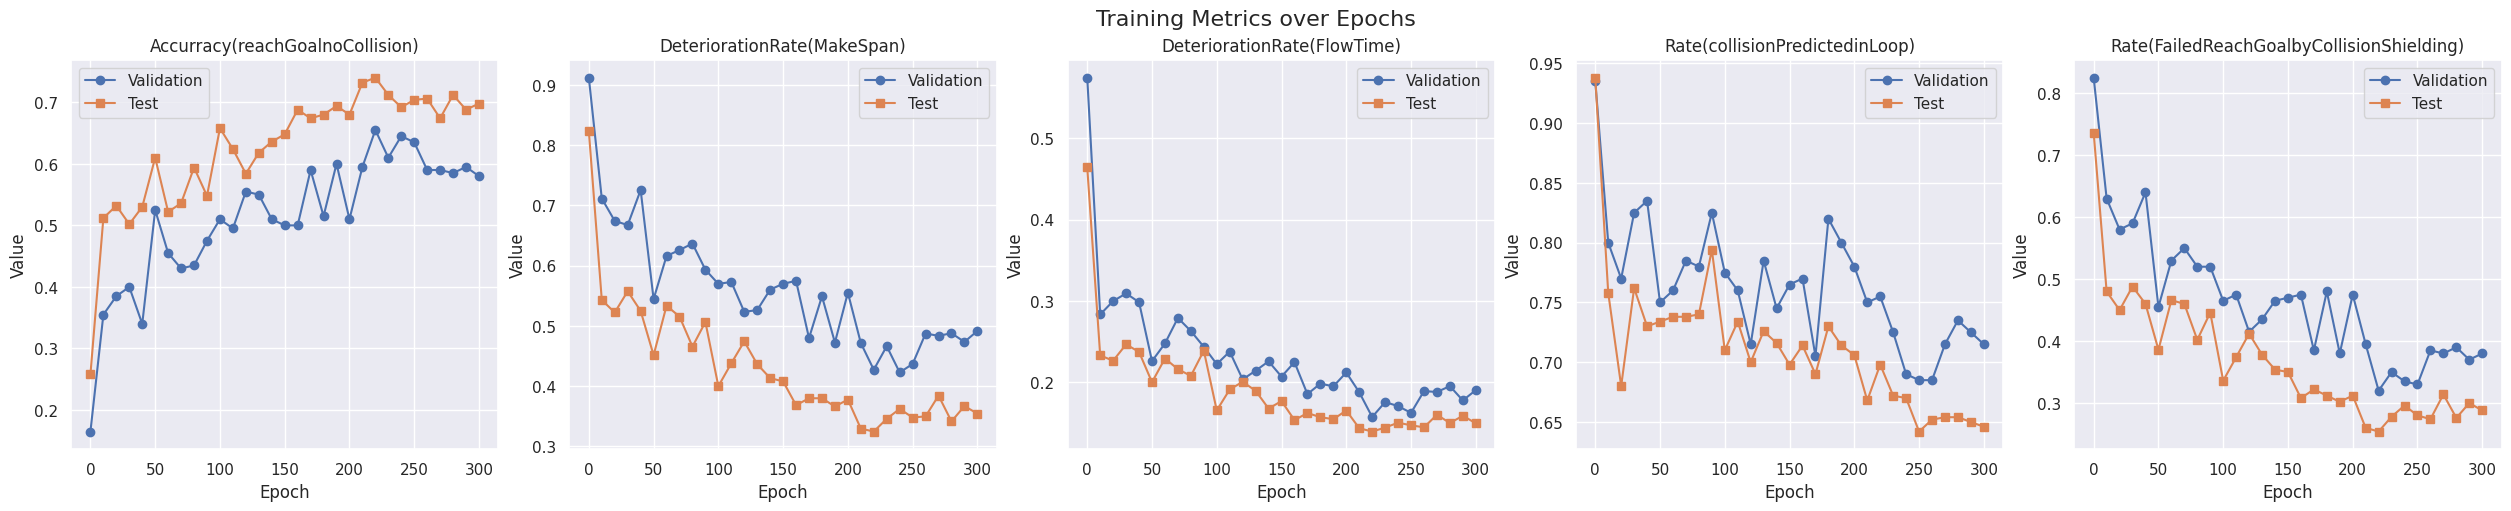

In [12]:
metrics_gat = parse_training_log(log_file_path='/home/roger/Desktop/DA150X Degree Project/7 Training Results/gat/exp_debug_extended.log')
plot_metrics(metrics_by_epoch=metrics_gat)

# Specific plot

In [15]:
def compare_single_metric(
    metrics_by_epoch_1, metrics_by_epoch_2,
    metric_name, dataset='valid',
    label_1='Run 1', label_2='Run 2', title=None, ylabel=None
):
    
    sns.set_theme(style='darkgrid')  # Use 'darkgrid', 'whitegrid', etc.
    
    if dataset not in ['valid', 'test']:
        raise ValueError("dataset must be 'valid' or 'test'")

    epochs_1 = sorted(metrics_by_epoch_1.keys())
    values_1 = [metrics_by_epoch_1[epoch][dataset][metric_name] for epoch in epochs_1]

    epochs_2 = sorted(metrics_by_epoch_2.keys())
    values_2 = [metrics_by_epoch_2[epoch][dataset][metric_name] for epoch in epochs_2]

    # Plot
    plt.figure(figsize=(6, 4))
    plt.plot(epochs_1, values_1, label=label_1, marker='o', alpha=0.7)
    plt.plot(epochs_2, values_2, label=label_2, marker='s', alpha=0.7)

    if not title:
        title = f"{metric_name} over Epochs ({dataset.capitalize()})"
    plt.title(title)
    plt.xlabel("Epoch")
    if not ylabel:
        ylabel = metric_name
    plt.ylabel(ylabel)
    plt.ylim(0, 1)
    plt.grid(True)
    plt.legend()

    ax = plt.gca()
    ax.xaxis.set_major_locator(MultipleLocator(25))
    ax.yaxis.set_major_locator(MultipleLocator(0.1))

    plt.tight_layout()
    plt.show()

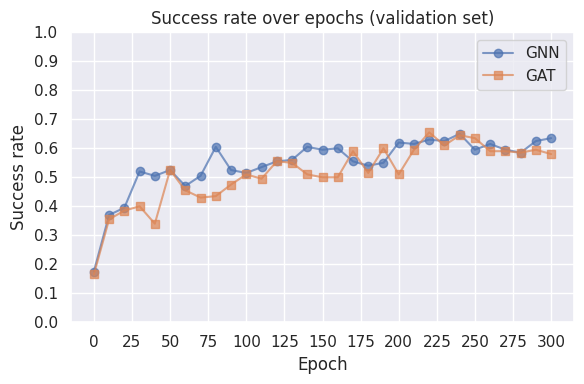

In [16]:
compare_single_metric(metrics_by_epoch_1=metrics_no_gat,
                      metrics_by_epoch_2=metrics_gat,
                      metric_name='Accurracy(reachGoalnoCollision)',
                      dataset='valid',
                      label_1='GNN',
                      label_2='GAT',
                      title='Success rate over epochs (validation set)',
                      ylabel='Success rate')


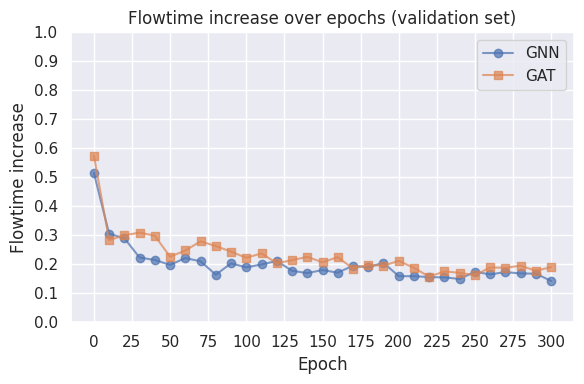

In [17]:
compare_single_metric(metrics_by_epoch_1=metrics_no_gat,
                      metrics_by_epoch_2=metrics_gat,
                      metric_name='DeteriorationRate(FlowTime)',
                      dataset='valid',
                      label_1='GNN',
                      label_2='GAT',
                      title='Flowtime increase over epochs (validation set)',
                      ylabel='Flowtime increase')

In [34]:
metrics_no_gat[240]

{'valid': {'Accurracy(reachGoalnoCollision)': 0.65,
  'DeteriorationRate(MakeSpan)': 0.4272,
  'DeteriorationRate(FlowTime)': 0.1494,
  'Rate(collisionPredictedinLoop)': 0.685,
  'Rate(FailedReachGoalbyCollisionShielding)': 0.335},
 'test': {'Accurracy(reachGoalnoCollision)': 0.734,
  'DeteriorationRate(MakeSpan)': 0.3198,
  'DeteriorationRate(FlowTime)': 0.123,
  'Rate(collisionPredictedinLoop)': 0.646,
  'Rate(FailedReachGoalbyCollisionShielding)': 0.258}}